In [1]:
import numpy
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing, svm

import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.pipeline import make_pipeline

In [2]:
exam_path = "/home/sebastian/Descargas/tesis/all.csv"
eeg_dataset = pd.read_csv(exam_path, error_bad_lines=False)
eeg_dataset.head()

,delta,tetha,alpha,beta,gamma,class
0,0.190776,0.058923,0.129363,0.029849,0.012989,1
1,0.182318,0.095967,0.110752,0.049693,0.046891,1
2,0.183269,0.079512,0.116541,0.048885,0.049781,1
3,0.351450,0.066773,0.072149,0.030012,0.021886,1
4,0.242536,0.101548,0.174173,0.047890,0.026310,1


In [3]:
X = eeg_dataset.iloc[:,0:5].values
y = eeg_dataset.iloc[:,5].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [4]:
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [5]:
no_linear_svc = svm.NuSVC(gamma=0.47)
no_linear_svc.fit(x_train, y_train)
score = no_linear_svc.score(x_test, y_test)
score

0.7777777777777778

In [7]:
y_pred = no_linear_svc.predict(x_test)
own_mets = (y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(*own_mets)
confusion_matrix

array([[101,  30],
       [ 26,  95]])

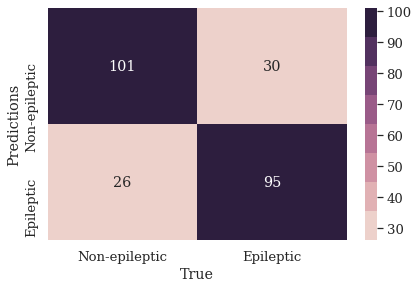

In [8]:
sb.set(rc={'figure.figsize':(6.7,4.27)},style='whitegrid',font_scale=1.2,palette=sb.cubehelix_palette(8))
sb.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
columns = ['Non-epileptic','Epileptic']
df_cm = pd.DataFrame(confusion_matrix, index=columns, columns=columns)

grafica = sb.heatmap(df_cm,cmap=sb.cubehelix_palette(8),annot=True,fmt='g')
plt.ylabel('True positives')
plt.xlabel('Predictions')
grafica.set(xlabel='True',ylabel='Predictions')
plt.show()

In [9]:
acc = metrics.accuracy_score(*own_mets)
recall = metrics.recall_score(*own_mets)
f1_score = metrics.f1_score(*own_mets)
precision = metrics.precision_score(*own_mets)

In [10]:
print(f"Accuracy: {acc} \nRecall: {recall} \nF1 Score: {f1_score} \nPrecision: {precision}")

Accuracy: 0.7777777777777778 
Recall: 0.7851239669421488 
F1 Score: 0.7723577235772359 
Precision: 0.76
